实验目的：
仿真不同间距的接收天线对于不同角度目标的探测


1.7615950459999123


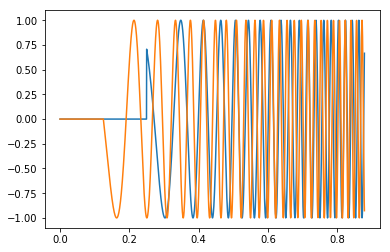

In [9]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np

def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]



Fs = 2048;  # sampling rate
Ts = 1.0/Fs; # sampling interval
fft_size = Fs/4
#t = np.arange(0,1,Ts) # time vector
fs = 2048   #resolution
T = 5
t = np.linspace(0, T, T*fs, endpoint=False)

t1 = np.arange(0.5,1.5,Ts)
w1 = chirp(t, f0=5, f1=400, t1=T , phi=90,method='linear')
w4 = chirp(t, f0=5, f1=400, t1=T , phi=45,method='linear')
n1 = np.zeros(256)
w2 = np.append(n1, w1)  #delay w1 to produce w2
n2 = np.zeros(512)
w3 = np.append(n2, w4)

#w2 =zero_to_nan(w2)
#w2 = np.asarray(w2)
w2 =w2[:fs*T]


plt.plot(t[:1800],w3[:1800])
plt.plot(t[:1800],w2[:1800])
plt.show
plt.savefig('Two Linear Chirp Signals.png', dpi=300)
print(w3[700]-w1[700])


Text(0, 0.5, 'power(dB)')

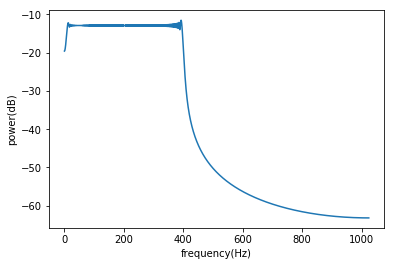

In [4]:
#fft w1
n = len(w1) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency rangen
Y = np.fft.fft(w1)/fft_size # fft computing and normalization
Y = Y[range(int(n/2))]
Y = np.clip(20*np.log10(np.abs(Y)), -120, 120)



plt.plot(frq,Y)
plt.xlabel("frequency(Hz)")
plt.ylabel("power(dB)")

Δ𝛷=2𝜋Δ𝑑/𝜆

In [31]:
from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)

n = 6 # 1/n *pi  initial phase


# s_sine= np.sin(50.0 * 2.0*np.pi*t)          #sin
# s_cosine=np.sin(50.0 * 2.0*np.pi*t+np.pi/2)   #cosin 
s_sine = chirp(t, f0=100, f1=150, t1=10, method='linear')
s_cosine=chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
# r = np.sin(50.0 * 2.0*np.pi*t)
# r2 = np.sin(50.0 * 2.0*np.pi*t+np.pi/n)  #receive signal
r2 = chirp(t, f0=100, f1=150, t1=10, phi=180/n,method='linear')

qua_phase = r2*s_sine    # receive signal multiply sin signal  Quadrature phase
in_phase=  r2*s_cosine    # receive signal multiply cosin signal in phase

# plt.plot(t[:50],in_phase[:50],'r')
# plt.plot(t[:50],qua_phase[:50],'b')
# plt.grid()
# plt.show()

fft_signal=fft(r2)
fft_qua_phase= fft(qua_phase)  #quadrature phase
fft_in_phase = fft(in_phase)  #in phase



initial_phase=np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
initial_phase =1/(0.5-initial_phase)

print('Initial Phase was:1/%.1f'%initial_phase, '*pi')

Initial Phase was:1/6.0 *pi


In [14]:
initial_phase

-2.0685030197070067e-05

In [48]:
a =np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
1/(0.5-a)

6.00235751091774

-1.8268069976388723